In [1]:
# Импортировать необходимые библиотеки
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Загрузить данные MNIST
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Предобработка данных
train_images = train_images / 255.0
test_images = test_images / 255.0

# Преобразовать метки в one-hot формат
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)



In [5]:
# Создать модель нейросети
model = Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Компиляция модели
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3700 - accuracy: 0.8938 - val_loss: 0.1752 - val_accuracy: 0.9481
Epoch 2/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1796 - accuracy: 0.9475 - val_loss: 0.1218 - val_accuracy: 0.9636
Epoch 3/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1369 - accuracy: 0.9586 - val_loss: 0.1015 - val_accuracy: 0.9696
Epoch 4/5
938/938 [==============================] - 2s 2ms/step - loss: 0.1131 - accuracy: 0.9658 - val_loss: 0.0898 - val_accuracy: 0.9734
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0861 - accuracy: 0.9736
Точность на тестовых данных: 0.9735999703407288


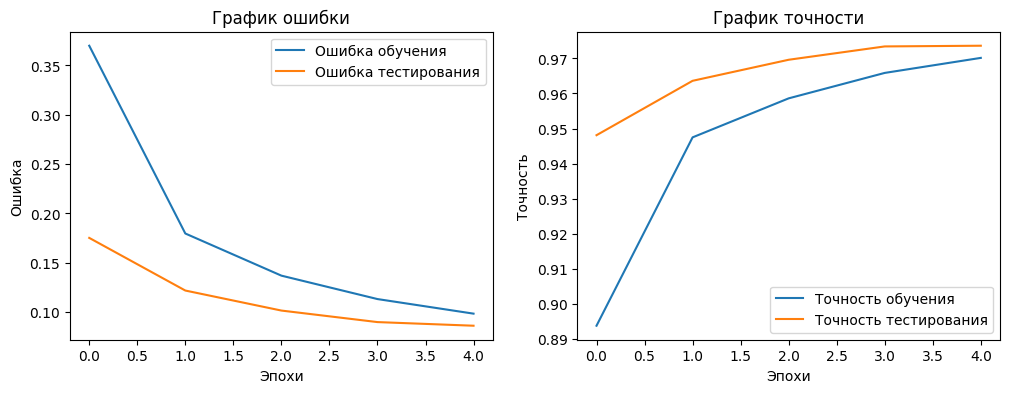

In [6]:

# Обучение модели и запись истории обучения
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Точность на тестовых данных: {test_acc}')

# Построение графиков ошибки и точности
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Ошибка обучения')
plt.plot(history.history['val_loss'], label='Ошибка тестирования')
plt.legend()
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('График ошибки')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Точность обучения')
plt.plot(history.history['val_accuracy'], label='Точность тестирования')
plt.legend()
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.title('График точности')

plt.show()


In [19]:
import numpy as np
predictions = model.predict(test_images)
for i in range(11):
    predicted_class = np.argmax(predictions[i])
    confidence = predictions[i][predicted_class]
    print(f"Sample {i}: Predicted lable: {predicted_class}, True label: {np.argmax(test_labels[i])}")



313/313 [==============================] - 0s 708us/step
Sample 0: Predicted lable: 7, True label: 7
Sample 1: Predicted lable: 2, True label: 2
Sample 2: Predicted lable: 1, True label: 1
Sample 3: Predicted lable: 0, True label: 0
Sample 4: Predicted lable: 4, True label: 4
Sample 5: Predicted lable: 1, True label: 1
Sample 6: Predicted lable: 4, True label: 4
Sample 7: Predicted lable: 9, True label: 9
Sample 8: Predicted lable: 5, True label: 5
Sample 9: Predicted lable: 9, True label: 9
Sample 10: Predicted lable: 0, True label: 0
